In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

from sklearn.tree import (DecisionTreeClassifier,
                          DecisionTreeRegressor,
                          plot_tree,
                          export_text)

from sklearn import metrics
from sklearn.metrics import (accuracy_score,
                            mean_squared_error)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# данные
df= pd.read_excel('WHO_life_expectancy.xlsx')
df

,Country,alcohol,life,obesity,tobacco,gdppc,schooling
0,Afghanistan,0.013422,59.801686,8.079448,27.296667,422.617783,4.156
1,Albania,5.176423,76.471155,15.617016,25.740000,3627.858808,10.184
2,Algeria,0.478366,75.572598,16.327990,21.616667,4161.987977,7.044
3,American Samoa,NaN,NaN,70.009608,NaN,11260.582972,NaN
4,Andorra,11.385535,NaN,15.000221,36.113333,40583.703903,NaN
...,...,...,...,...,...,...,...
194,Venezuela (Bolivarian Republic of),6.721361,73.822921,20.007908,NaN,8693.307849,8.388
195,Viet Nam,6.820298,73.015297,0.695129,25.016667,1738.288261,8.170
196,Yemen,0.064133,66.083129,7.538262,23.453333,985.855794,3.922
197,Zambia,3.611997,56.999995,5.410395,16.006667,1133.365127,7.322


In [4]:
df = df.dropna()
df

,Country,alcohol,life,obesity,tobacco,gdppc,schooling
0,Afghanistan,0.013422,59.801686,8.079448,27.296667,422.617783,4.156
1,Albania,5.176423,76.471155,15.617016,25.740000,3627.858808,10.184
2,Algeria,0.478366,75.572598,16.327990,21.616667,4161.987977,7.044
7,Argentina,7.507287,75.345043,22.670473,26.800000,9216.230935,9.562
8,Armenia,4.936877,73.589968,17.309774,27.216667,2902.097977,10.495
...,...,...,...,...,...,...,...
191,Uruguay,6.349002,76.026716,21.513108,24.753333,11813.377083,8.576
195,Viet Nam,6.820298,73.015297,0.695129,25.016667,1738.288261,8.170
196,Yemen,0.064133,66.083129,7.538262,23.453333,985.855794,3.922
197,Zambia,3.611997,56.999995,5.410395,16.006667,1133.365127,7.322


In [5]:
df.describe()

,alcohol,life,obesity,tobacco,gdppc,schooling
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,6.067854,71.879731,15.667134,22.574156,14076.439044,8.858409
std,4.327398,7.885118,9.045985,9.261844,18613.957985,2.737133
min,0.000000,49.159333,0.695129,4.433333,198.412979,2.096000
25%,2.060621,66.442702,8.059716,15.034167,1788.512419,6.640250
50%,5.728240,73.852569,16.288147,23.183333,5165.116222,9.319000
75%,9.645232,77.506345,21.011466,28.463333,20151.318863,11.136000
max,18.048815,83.189024,58.436291,50.603333,97932.441240,13.192000


In [6]:
# посмотрим на график распределения стран по двум переменным
fig = px.scatter(df, x='alcohol', y='life', hover_data = ['Country'])
fig.show()

## Агломеративно-иерархическая кластеризация (дендрограмма)

In [7]:
# укажем признаки для выделения кластеров
X = df[['life','alcohol', 'obesity', 'tobacco', 'gdppc', 'schooling']]

# проведем их стандартизацию
scaler = StandardScaler()

scaler.fit(X)
X_norm = scaler.transform(X)

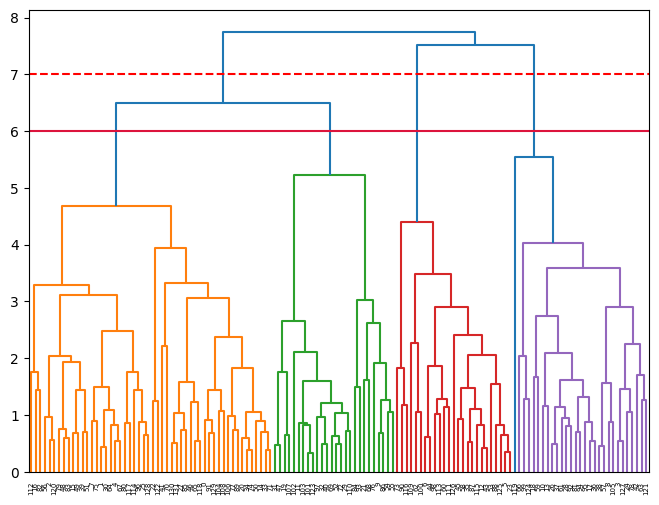

In [8]:
# Выполним иерархическую агломеративную кластеризацию
clusters = linkage(X_norm, method="complete") # "complete" измеряет расстояние между самыми удаленными точками в двух кластерах

# Построим дендрограмму
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Построение горизонтальной линии на основе первого наибольшего расстояния между кластерами
plt.axhline(7, color='red', linestyle='--');
# Построение горизонтальной линии на основе второго по величине расстояния между кластерами
plt.axhline(6, color='crimson')

In [39]:
# посмотрим на график распределения стран по кластерам
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="complete")
clustering_model.fit(X_norm)

fig = px.scatter(df, x='life', y='alcohol',
                 hover_data = ['Country'],
                 color = clustering_model.labels_)
fig.show()

## CART
### Регрессия

In [10]:
# укажем регрессоры
X = df[['alcohol', 'obesity', 'tobacco', 'gdppc','schooling']]
# и зависимую переменную
y= df['life']

#### Подвыборка для демонстрации работы алгоритма

In [11]:
# чтобы понять механизм работы алгоритма, возьмем только первые пять наблюдений
df1 = df.iloc[:5]
X1 = X.iloc[:5]
y1 = y.iloc[:5]
df1

,Country,alcohol,life,obesity,tobacco,gdppc,schooling
0,Afghanistan,0.013422,59.801686,8.079448,27.296667,422.617783,4.156
1,Albania,5.176423,76.471155,15.617016,25.740000,3627.858808,10.184
2,Algeria,0.478366,75.572598,16.327990,21.616667,4161.987977,7.044
7,Argentina,7.507287,75.345043,22.670473,26.800000,9216.230935,9.562
8,Armenia,4.936877,73.589968,17.309774,27.216667,2902.097977,10.495


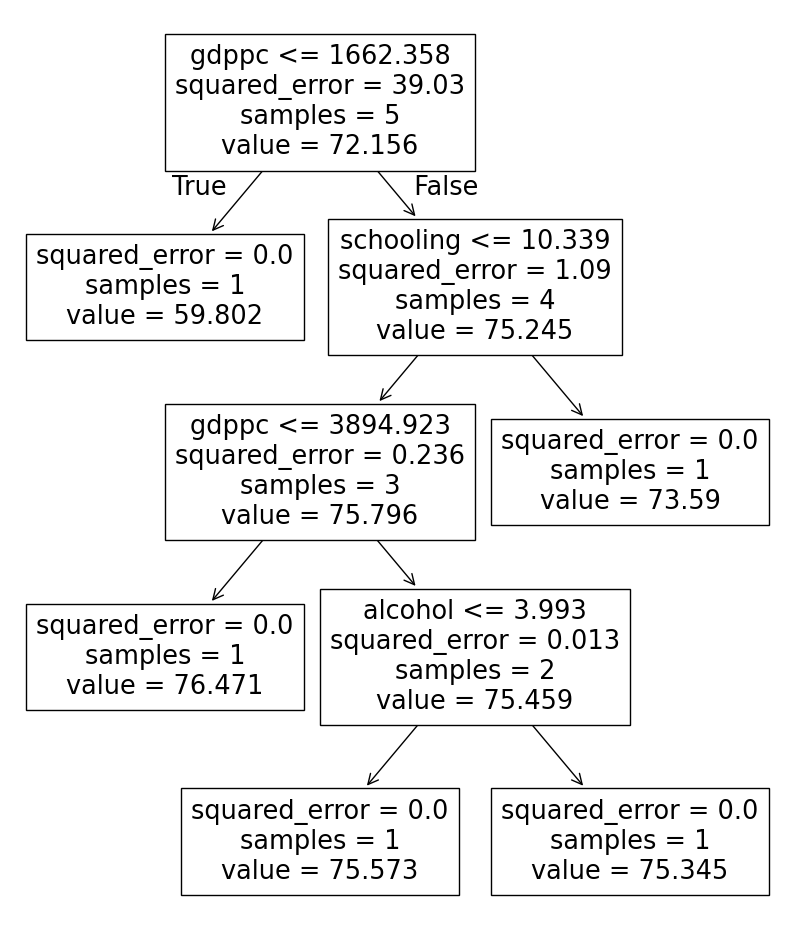

In [ ]:
# Инициализируем модель DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion ='squared_error', # criterion задает функцию потерь
                            random_state=2)             # random_state обеспечивает воспроизводимость результатов модели

# Обучение модели DecisionTreeRegressor
model0 = reg.fit(X1,y1)

# Визуализируем дерево решений
plt.figure(figsize=(10,12))
plot_tree(model0, feature_names=X1.columns)

In [13]:
# Посчитаем IG информации в корневом узле
ig = 39.03 - (1/5 * 0 + 4/5 * 1.09)
ig

38.158

#### Полная выборка

In [14]:
# Перейдем к работе на всей выборке
# Разделим ее на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=99)

In [15]:
# Обучаем модель
model1 = reg.fit(X_train, y_train)

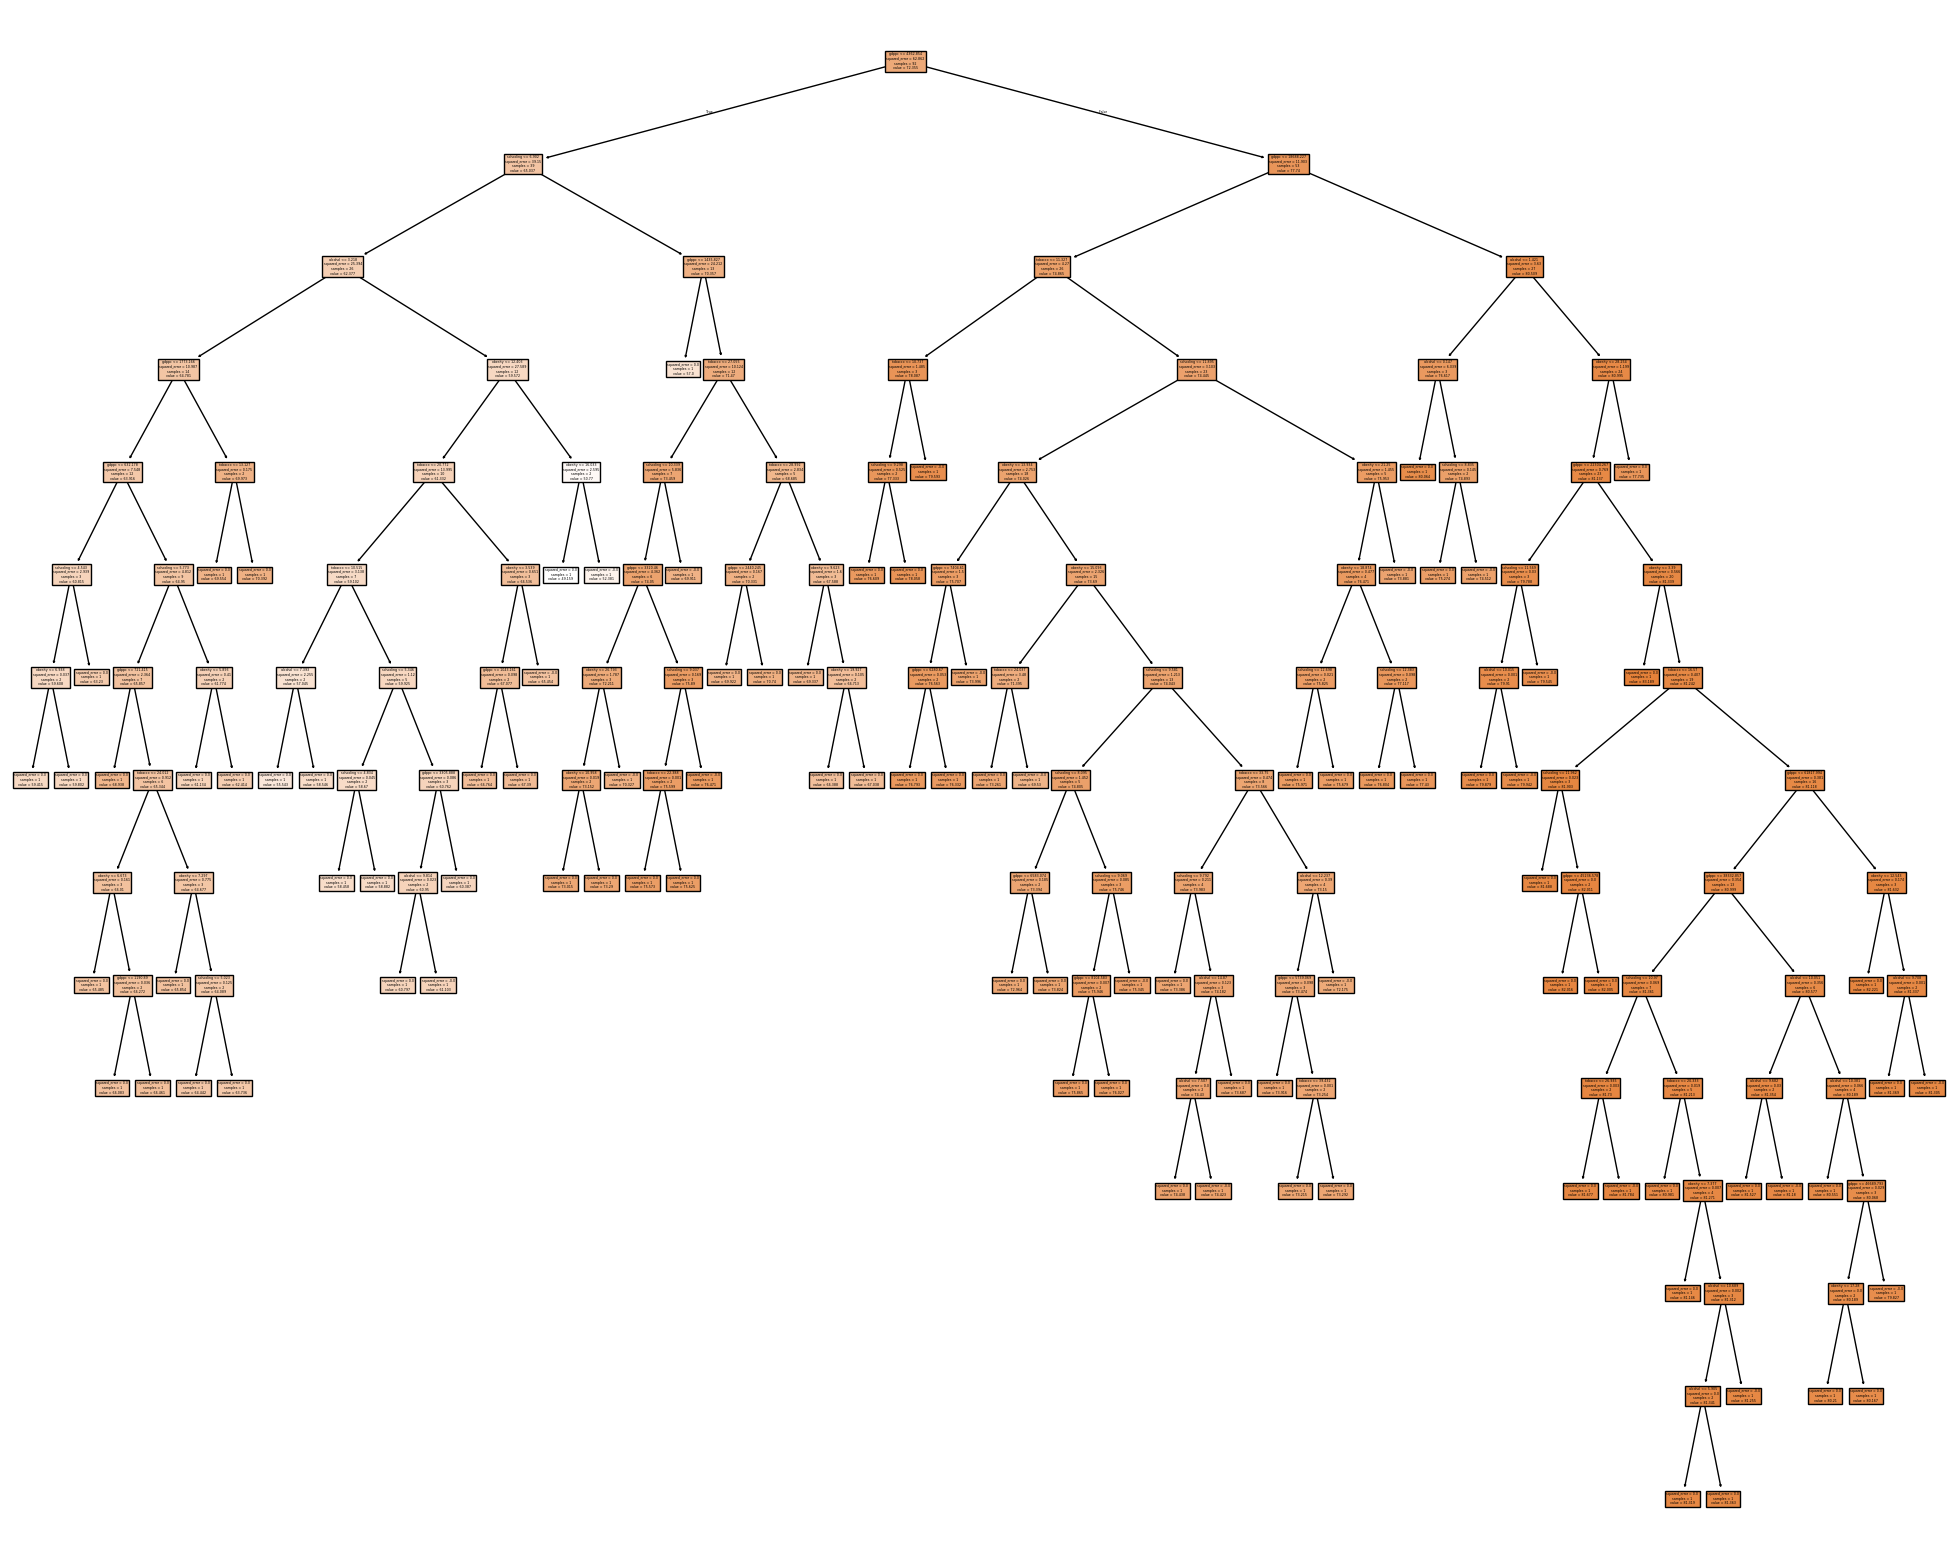

In [16]:
# Мы можем представить дерево в виде графика
plt.figure(figsize=(25,20))
plot_tree(model1, feature_names=X.columns, filled = True);

In [17]:
# Мы можем представить дерево в виде текста
# если условие в узле соблюдается — двигаемся направо, иначе налево
text_representation = export_text(reg, feature_names=X.columns)
print(text_representation)

|--- gdppc <= 4362.85
|   |--- schooling <= 6.90
|   |   |--- alcohol <= 3.22
|   |   |   |--- gdppc <= 1773.17
|   |   |   |   |--- gdppc <= 632.18
|   |   |   |   |   |--- schooling <= 4.54
|   |   |   |   |   |   |--- obesity <= 6.94
|   |   |   |   |   |   |   |--- value: [59.41]
|   |   |   |   |   |   |--- obesity >  6.94
|   |   |   |   |   |   |   |--- value: [59.80]
|   |   |   |   |   |--- schooling >  4.54
|   |   |   |   |   |   |--- value: [63.23]
|   |   |   |   |--- gdppc >  632.18
|   |   |   |   |   |--- schooling <= 5.77
|   |   |   |   |   |   |--- gdppc <= 721.41
|   |   |   |   |   |   |   |--- value: [68.94]
|   |   |   |   |   |   |--- gdppc >  721.41
|   |   |   |   |   |   |   |--- tobacco <= 24.01
|   |   |   |   |   |   |   |   |--- obesity <= 6.67
|   |   |   |   |   |   |   |   |   |--- value: [65.49]
|   |   |   |   |   |   |   |   |--- obesity >  6.67
|   |   |   |   |   |   |   |   |   |--- gdppc <= 1190.89
|   |   |   |   |   |   |   |   |   |   |--- va

In [18]:
# Проверим, насколько дерево хорошо предсказывает значения на тестовой выборке
y_pred_train1 = reg.predict(X_train)
y_pred_test1 = reg.predict(X_test)

mse_train1 = mean_squared_error(y_train, y_pred_train1)
mse_test1 = mean_squared_error(y_test, y_pred_test1)

print(f'MSE на обучении: {mse_train1: .2f}')
print(f'MSE на тест: {mse_test1: .2f}')

MSE на обучении:  0.00
MSE на тест:  35.04


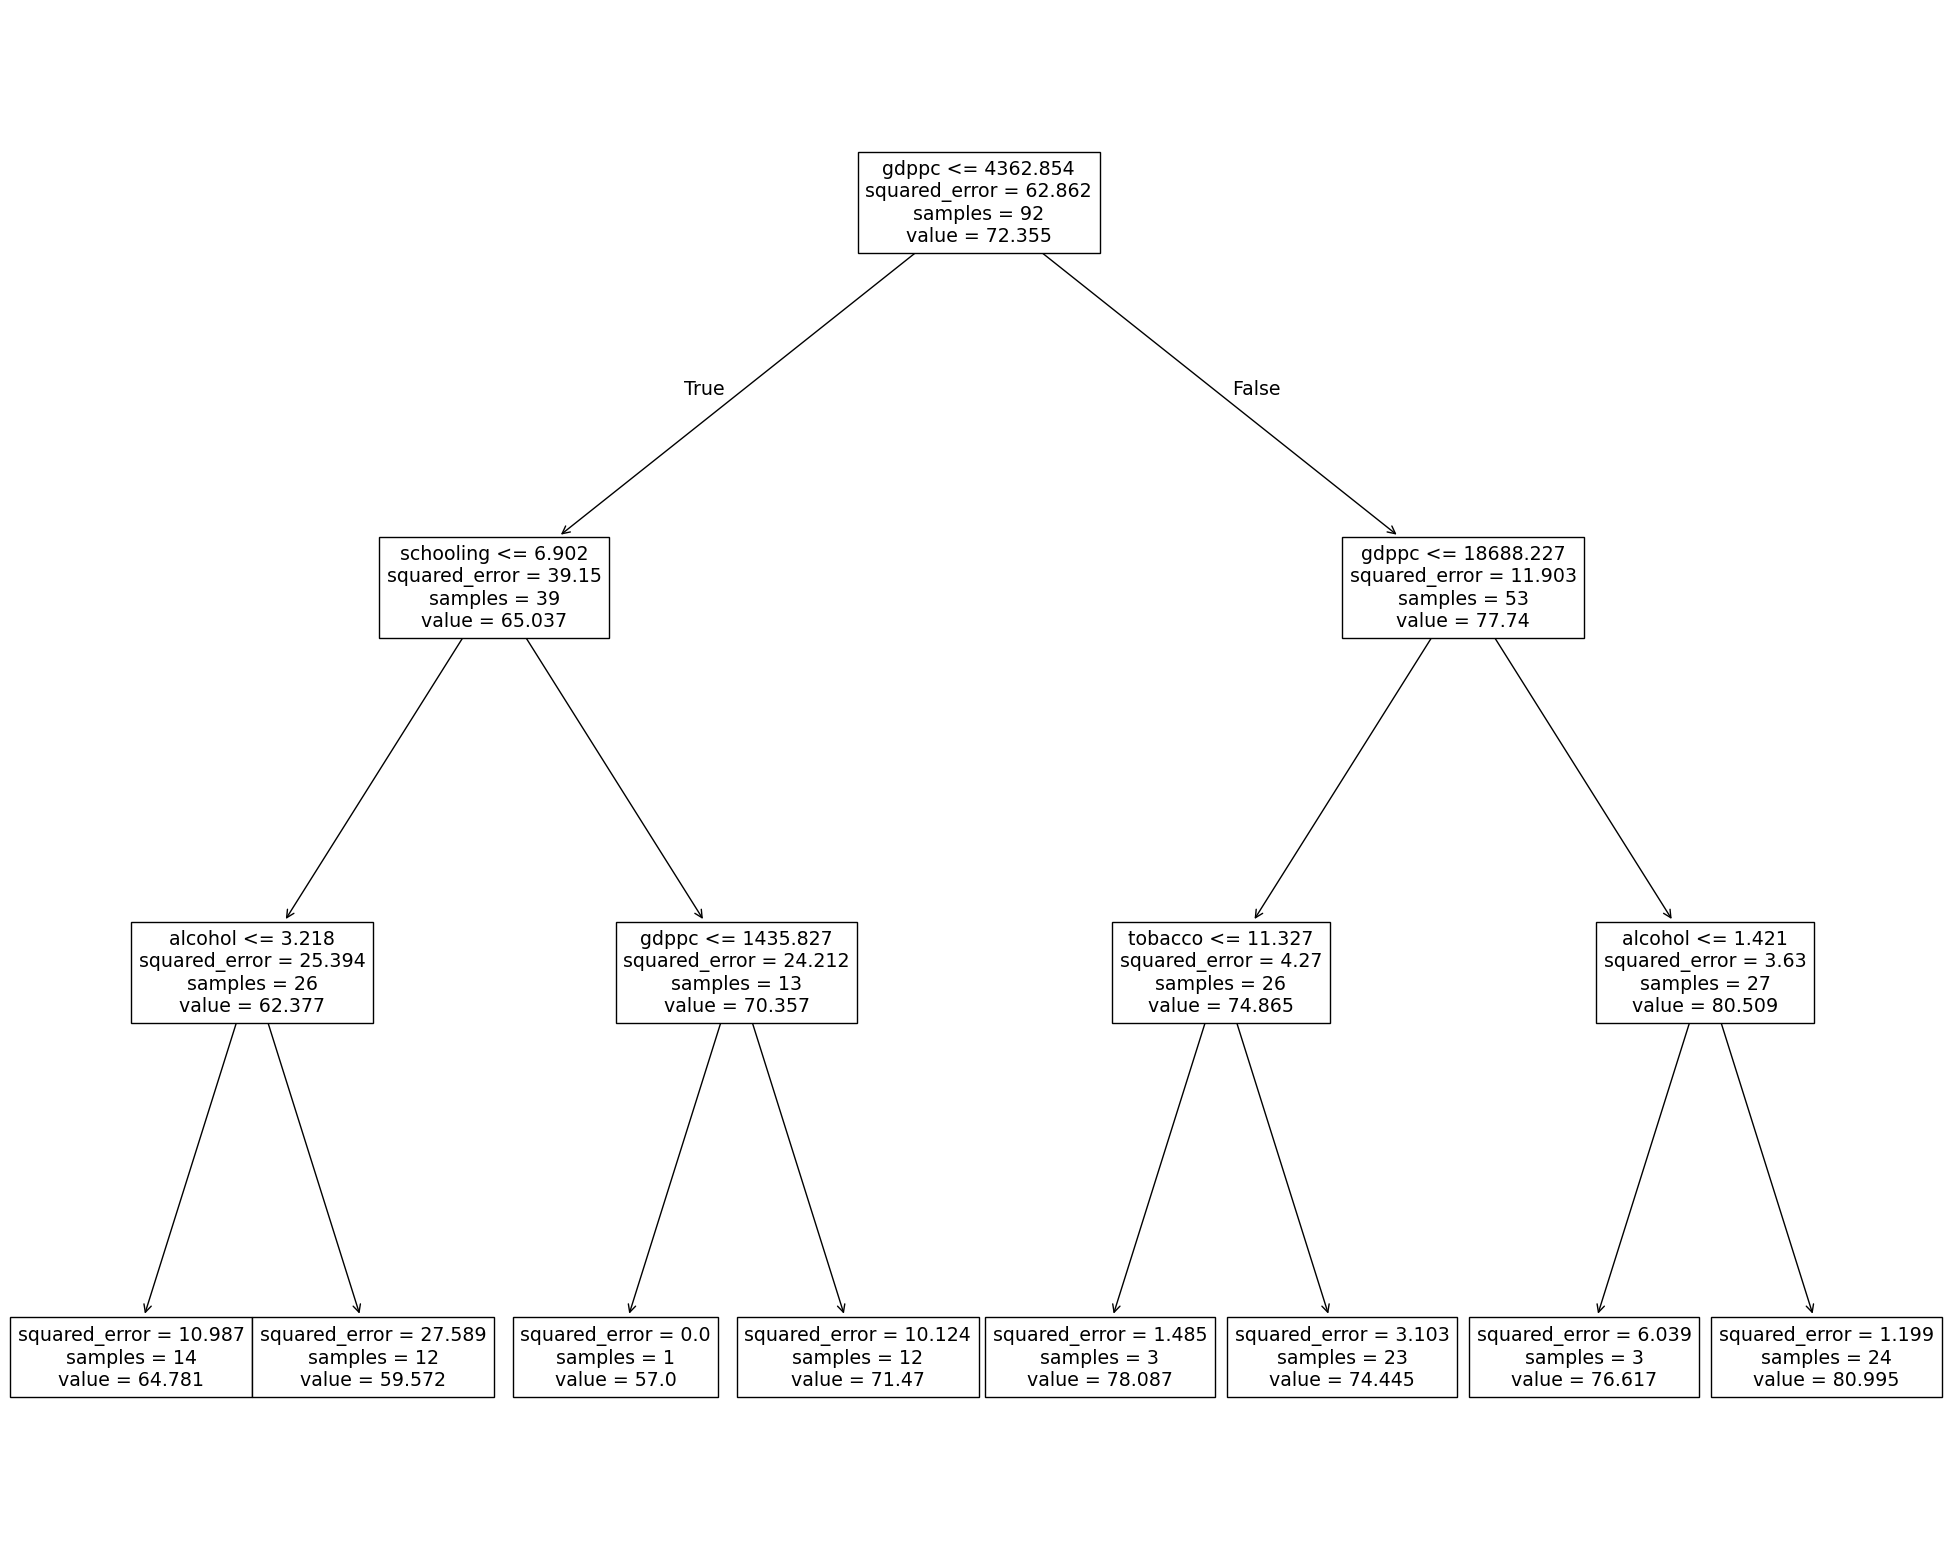

In [19]:
# попробуем установить критерий остановки, чтобы избежать переобучения
reg2 = DecisionTreeRegressor(criterion ='squared_error',
                             random_state=2,
                             max_depth = 3) # Глубина дерева: ограничение на количество уровней в дереве

# Обучаем модель
model2 = reg2.fit(X_train, y_train)

# Рисуем график
plt.figure(figsize=(25,20))
plot_tree(model2, feature_names=X.columns);

In [20]:
# пересчитаем MSE для новой модели
y_pred_train2 = reg2.predict(X_train)
y_pred_test2 = reg2.predict(X_test)

mse_train2 = mean_squared_error(y_train, y_pred_train2)
mse_test2 = mean_squared_error(y_test, y_pred_test2)

print(f'MSE на обучении {mse_train2: .2f}')
print(f'MSE на тест {mse_test2: .2f}')

MSE на обучении  7.92
MSE на тест  29.34


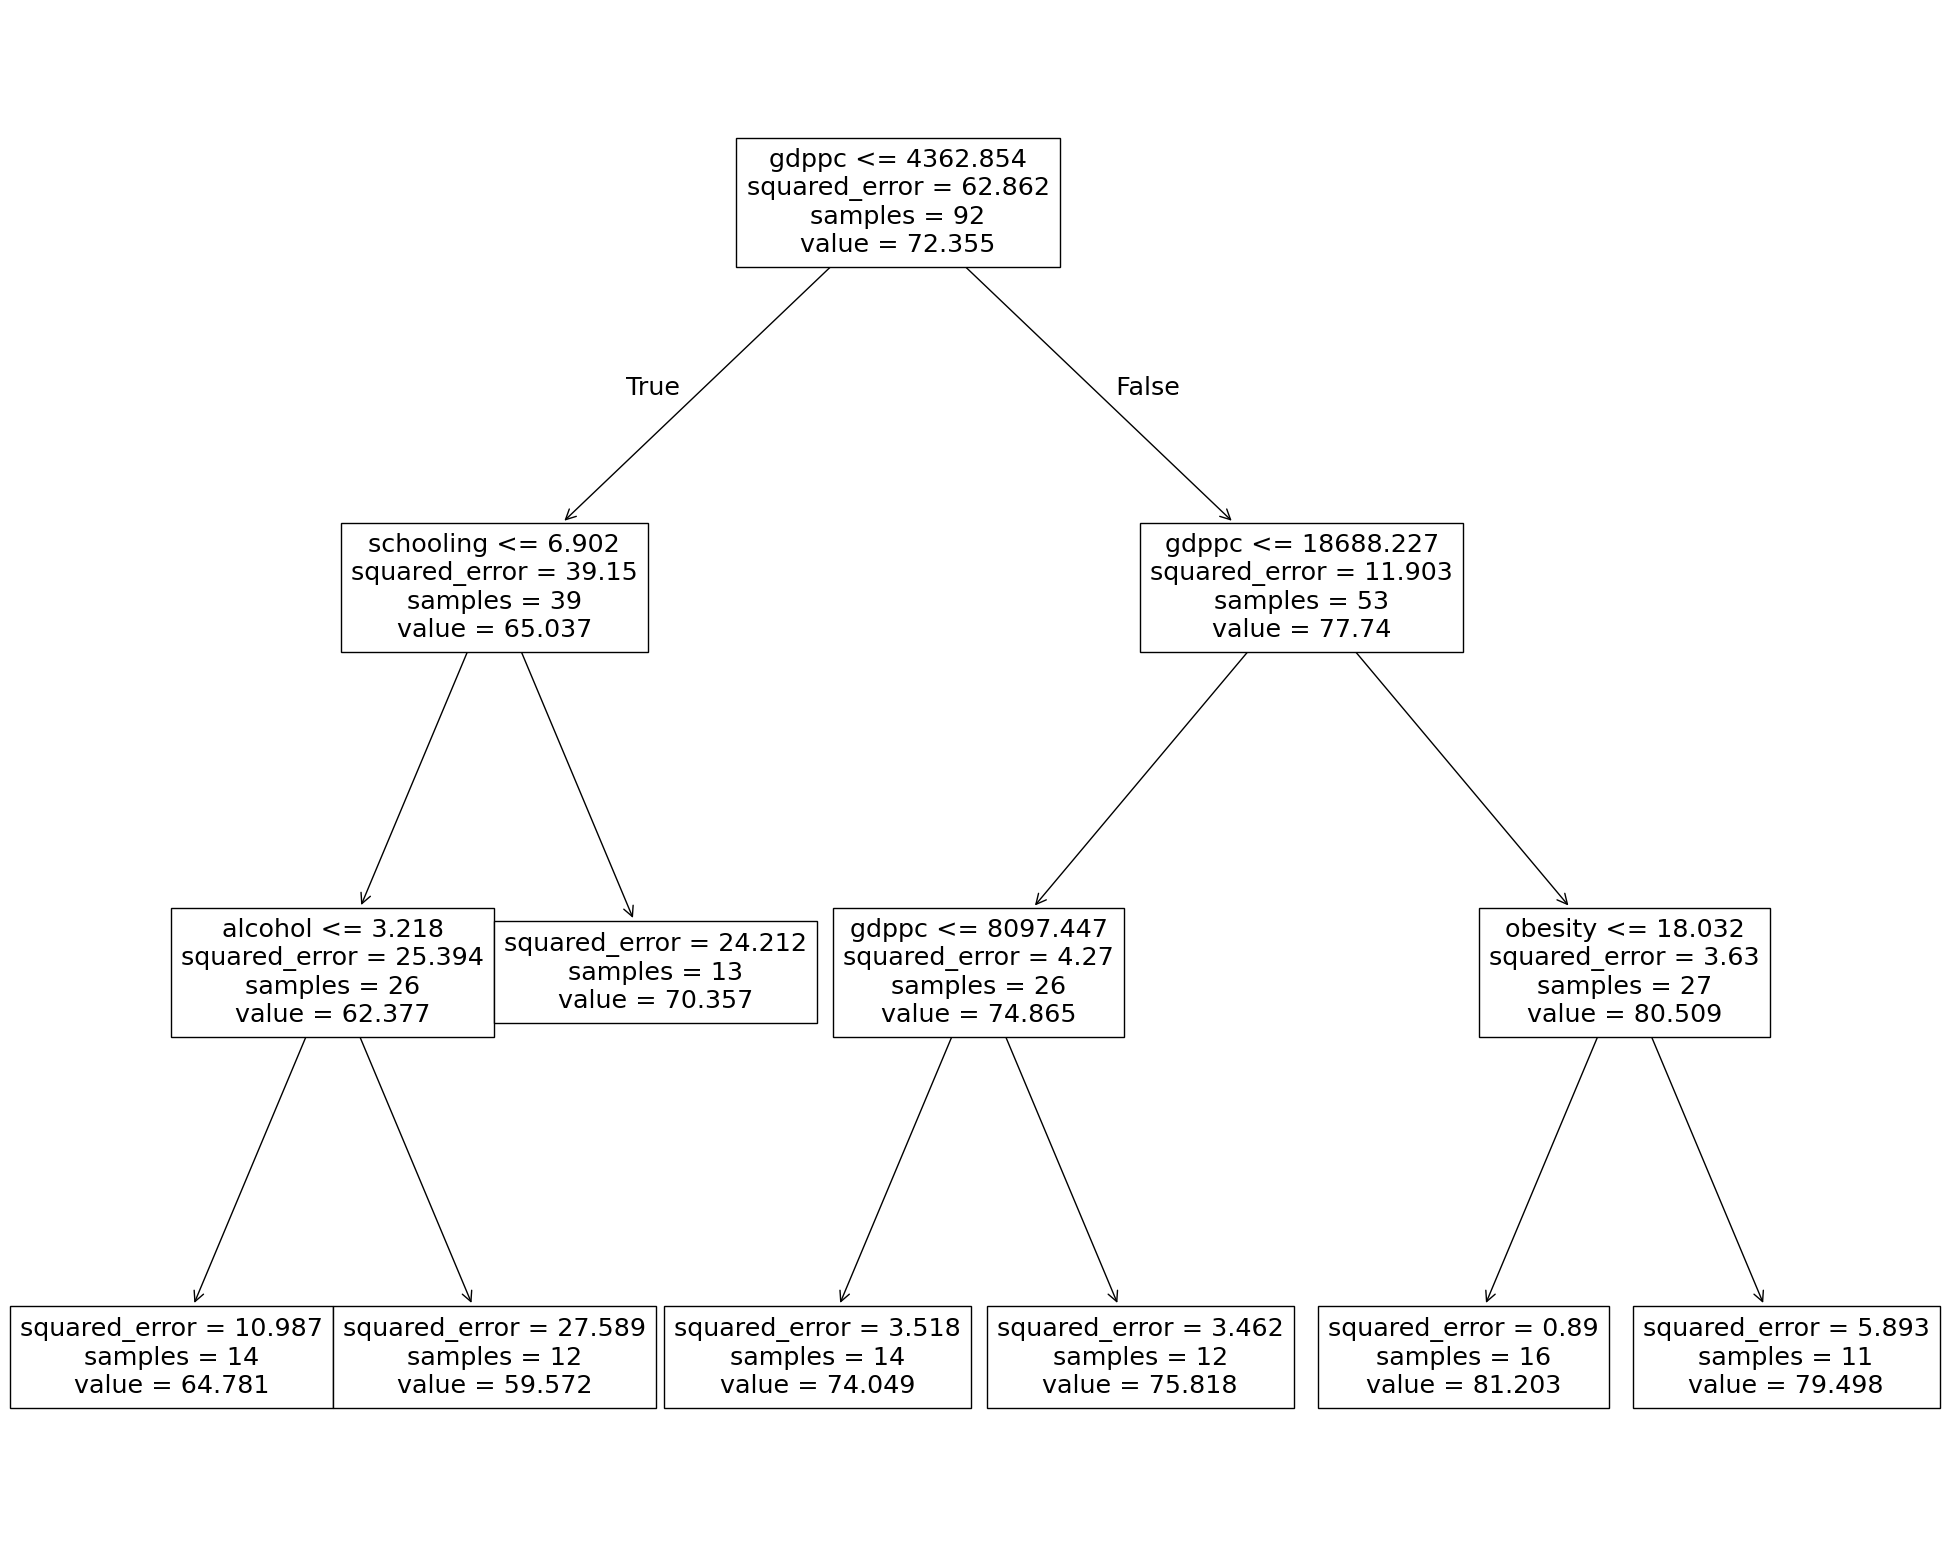

In [21]:
# попробуем установить еще один критерий — минимальное количество наблюдений в листе
reg3 = DecisionTreeRegressor(criterion ='squared_error',
                             random_state=2,
                             max_depth = 3,
                             min_samples_leaf = 10)

model3 = reg3.fit(X_train, y_train)

plt.figure(figsize=(25,20))
plot_tree(model3, feature_names=X.columns);

In [22]:
# пересчитаем MSE
y_pred_train3 = reg3.predict(X_train)
y_pred_test3 = reg3.predict(X_test)

mse_train3 = mean_squared_error(y_train, y_pred_train3)
mse_test3 = mean_squared_error(y_test, y_pred_test3)

print(f'MSE на обучении {mse_train3: .2f}')
print(f'MSE на тест {mse_test3: .2f}')

MSE на обучении  10.54
MSE на тест  28.93


## Классификация

In [ ]:
# Выделим две группы стран: с ожидаемой продолжительностью жизни больше и меньше медианы
df['longlivers']= (df['life'] > df['life'].median()).astype(int)
df

C:\Users\dimav\AppData\Local\Temp\ipykernel_1804\1472009984.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,alcohol,life,obesity,tobacco,gdppc,schooling,longlivers
0,Afghanistan,0.013422,59.801686,8.079448,27.296667,422.617783,4.156,0
1,Albania,5.176423,76.471155,15.617016,25.740000,3627.858808,10.184,1
2,Algeria,0.478366,75.572598,16.327990,21.616667,4161.987977,7.044,1
7,Argentina,7.507287,75.345043,22.670473,26.800000,9216.230935,9.562,1
8,Armenia,4.936877,73.589968,17.309774,27.216667,2902.097977,10.495,0
...,...,...,...,...,...,...,...,...
191,Uruguay,6.349002,76.026716,21.513108,24.753333,11813.377083,8.576,1
195,Viet Nam,6.820298,73.015297,0.695129,25.016667,1738.288261,8.170,0
196,Yemen,0.064133,66.083129,7.538262,23.453333,985.855794,3.922,0
197,Zambia,3.611997,56.999995,5.410395,16.006667,1133.365127,7.322,0


In [24]:
# меняем зависимую переменную
y = df[['longlivers']]

# независимые переменные остаются те же
# разбиваем их на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=99, test_size=0.3)

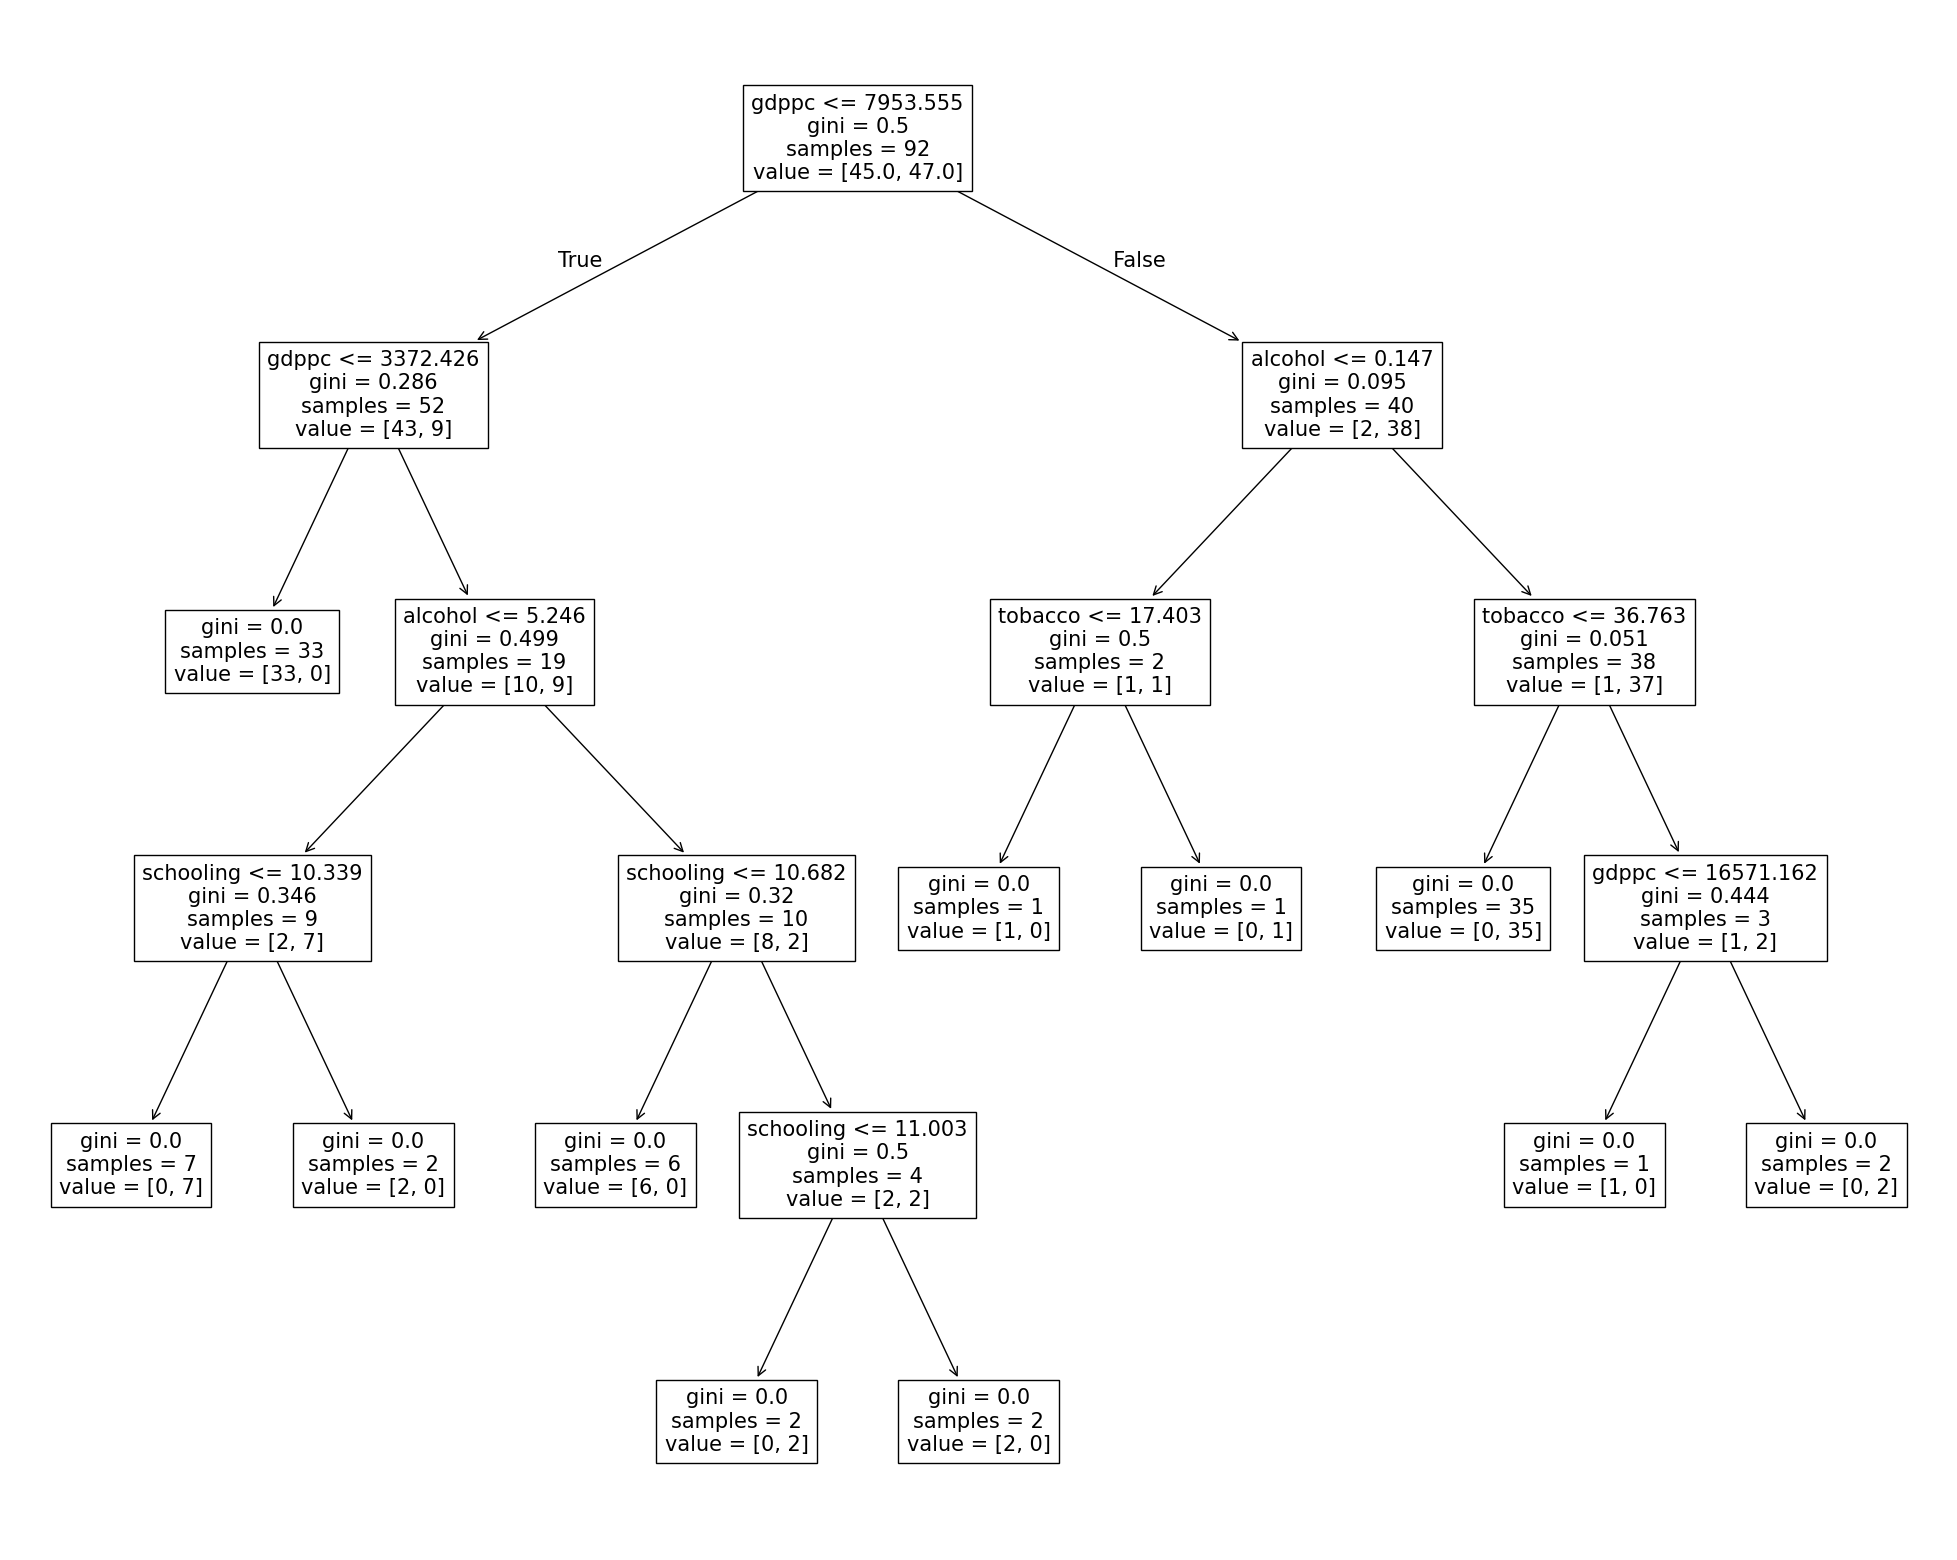

In [25]:
# Создадим объект DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Обучаем модель на обучающей выборке
clf = clf.fit(X_train,y_train)

# Нарисуем дерево
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=X.columns);

In [ ]:
# посчитаем accuracy модели
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [ ]:
# Посмотрим на ROC-AUC

auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)


trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()